### Steam Data
As the steam data correlates users and games, it is used to show most played games as per the number of hours and also based on the most number of active players. Besides GameStop, steam would be a reasonable gift source to consider, making the analysis relevant in this situation


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("steam-200k.csv", header=None, index_col=None, names=['UserID', 'Game', 'Action', 'Hours', 'Other'])

In [3]:
df.head()

,UserID,Game,Action,Hours,Other
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0


In [4]:
df['Game'].nunique()

5155

In [5]:
df = df[df['Action'] == 'play']
del df['Other']
del df['Action']
print(df.shape)
print(df.head())

(70489, 3)
      UserID                        Game  Hours
1  151603712  The Elder Scrolls V Skyrim  273.0
3  151603712                   Fallout 4   87.0
5  151603712                       Spore   14.9
7  151603712           Fallout New Vegas   12.1
9  151603712               Left 4 Dead 2    8.9


In [7]:
Top20_hours = df.groupby("Game", as_index=False).Hours.aggregate('sum').sort_values('Hours', ascending=False)[:10]
Top20_Users = df.groupby("Game", as_index=False).UserID.aggregate('count').sort_values('UserID', ascending=False)[:10].rename_axis({"UserID": "Users"}, axis="columns")

Top20_hours.set_index(pd.Index(list(range(10))), inplace=True)
Top20_Users.set_index(pd.Index(list(range(10))), inplace=True)

/home/armaan/Documents/gpu_env/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  


### Plotting Top 10 games based on number of hours played

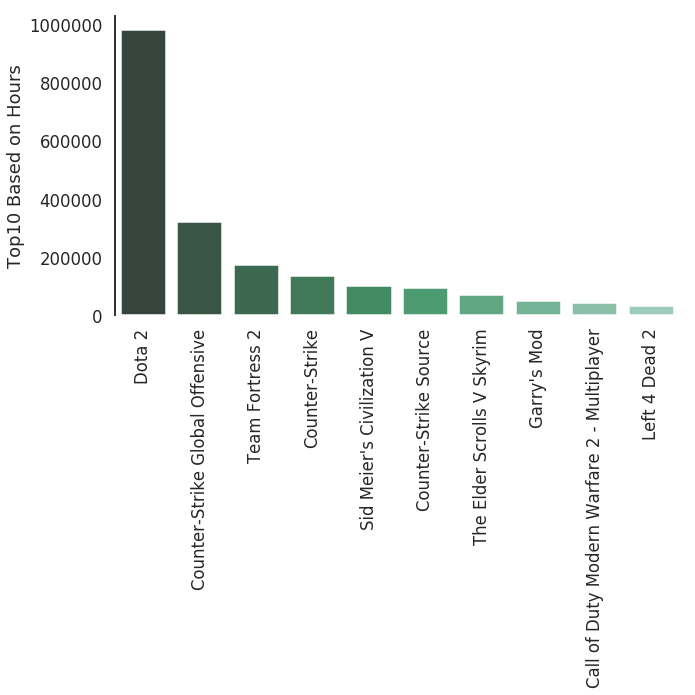

In [13]:
sns.set(style="white", context="talk")
fig1, ax1 = plt.subplots(figsize=(10, 10), sharex=True)  # Set up the matplotlib figure
x1 = np.array(list(Top20_hours['Game']))
y1 = np.array(list(Top20_hours['Hours']))
sns.barplot(x1, y1, palette="BuGn_d", ax=ax1)
ax1.set_ylabel("Top10 Based on Hours")
plt.xticks(rotation=90)
sns.despine(bottom=True)
plt.tight_layout(h_pad=5)

### Plotting Top 10 games based on number of users

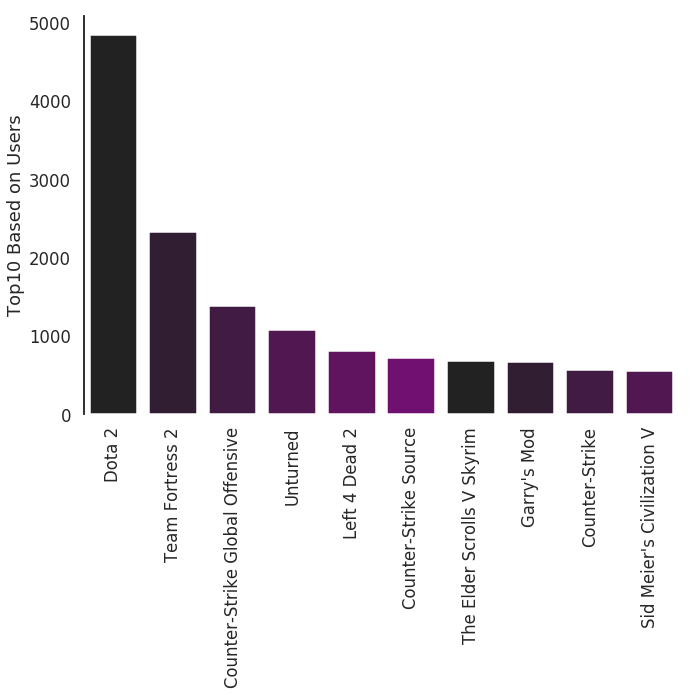

In [12]:
sns.set(style="white", context="talk")
fig2, ax2 = plt.subplots(figsize=(10, 10), sharex=True)  # Set up the matplotlib figure
x2 = np.array(list(Top20_Users['Game']))
y2 = np.array(list(Top20_Users['Users']))
sns.barplot(x2, y2, palette=sns.dark_palette("purple"), ax=ax2)
ax2.set_ylabel("Top10 Based on Users")
plt.xticks(rotation=90)
sns.despine(bottom=True)
plt.tight_layout(h_pad=5)

In [5]:
from bs4 import BeautifulSoup

In [6]:
import selenium

In [7]:
import urllib.request as urllib2
import re
import time
import random
import requests

In [8]:
time.sleep(random.randint(1,3))

### Scraping all game URLs

Beautiful soup is used to parse the URL containing 1200 PS4 game urls. All the urls are stored to a text file for easy repeated access.

For more details, see [Information Extraction](#Extracting-information-from-URLs)

In [10]:
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.89 Safari/537.36'}
game_links = []
# html_page = urllib2.urlopen("https://arstechnica.com")
r = requests.get("https://www.gamestop.com/on/demandware.store/Sites-gamestop-us-Site/default/Search-UpdateGrid?cgid=ps4-games&prefn1=includedChannels&prefv1=GS_US&prefn2=isEmbargoed&prefv2=false&prefn3=tradeOnly&prefv3=false&srule=top-sellers&start=24&sz=1500", headers=headers)
soup = BeautifulSoup(r.content, "html.parser")
# print(soup)
for link in soup.findAll('a', attrs={'href': re.compile("^/video-games/playstation-4/games/products")}):
#     print('https://www.gamestop.com/'+link.get('href'))
    game_links.append('https://www.gamestop.com/'+link.get('href'))


https://www.gamestop.com//video-games/playstation-4/games/products/kingdom-hearts-iii/10150783.html
https://www.gamestop.com//video-games/playstation-4/games/products/kingdom-hearts-iii/10150783.html
https://www.gamestop.com//video-games/playstation-4/games/products/kingdom-hearts-iii/10150783.html
https://www.gamestop.com//video-games/playstation-4/games/products/kingdom-hearts-iii/10150783.html
https://www.gamestop.com//video-games/playstation-4/games/products/nioh-2/11098270.html
https://www.gamestop.com//video-games/playstation-4/games/products/nioh-2/11098270.html
https://www.gamestop.com//video-games/playstation-4/games/products/nioh-2/11098270.html
https://www.gamestop.com//video-games/playstation-4/games/products/nioh-2/11098270.html
https://www.gamestop.com//video-games/playstation-4/games/products/tony-hawks-pro-skater-1-and-2/11102348.html
https://www.gamestop.com//video-games/playstation-4/games/products/tony-hawks-pro-skater-1-and-2/11102348.html
https://www.gamestop.com//

https://www.gamestop.com//video-games/playstation-4/games/products/nobunagas-ambition-taishi/10161353.html
https://www.gamestop.com//video-games/playstation-4/games/products/nobunagas-ambition-taishi/10161353.html
https://www.gamestop.com//video-games/playstation-4/games/products/nobunagas-ambition-taishi/10161353.html
https://www.gamestop.com//video-games/playstation-4/games/products/slay-the-spire/11096816.html
https://www.gamestop.com//video-games/playstation-4/games/products/slay-the-spire/11096816.html
https://www.gamestop.com//video-games/playstation-4/games/products/slay-the-spire/11096816.html
https://www.gamestop.com//video-games/playstation-4/games/products/slay-the-spire/11096816.html
https://www.gamestop.com//video-games/playstation-4/games/products/moving-out/11099620.html
https://www.gamestop.com//video-games/playstation-4/games/products/moving-out/11099620.html
https://www.gamestop.com//video-games/playstation-4/games/products/frostpunk-console-edition/11096546.html
http

In [19]:
print(len(set(game_links)))
all_games = list(set(game_links))
print(game_links[-5:])

1497
['https://www.gamestop.com//video-games/playstation-4/games/products/warhammer-vermintide-2-deluxe-edition/10177212.html', 'https://www.gamestop.com//video-games/playstation-4/games/products/mlb-the-show-19-mvp-edition/10170066.html', 'https://www.gamestop.com//video-games/playstation-4/games/products/mlb-the-show-19-mvp-edition/10170066.html', 'https://www.gamestop.com//video-games/playstation-4/games/products/mlb-the-show-19-mvp-edition/10170066.html', 'https://www.gamestop.com//video-games/playstation-4/games/products/mlb-the-show-19-mvp-edition/10170066.html']


In [13]:
with open('./all_games.txt', 'w') as f:
    for item in all_games:
        f.write("%s\n" % item)

<a id=’section_1’></a>
### Extracting information from URLs

The URLs stored in the all_games.txt file are retrieved and relevant information is extracted using Selenium. Selenium is chosen because GameStop reveals the complete game description when the "more details" button is pressed. Selenium is handy when it comes to automatic key presses and other UI based operations required on the browser.

Elements retrieved are:

1. Game Title
2. Price, depending on availability. (New, Pre-Owned and Digital)
3. Short Description of the game.
4. Full Description of the game

Ratings would be a relevant criteria as well, however, not all games are rated on GameStop and even those that are don't have enough number of ratings to be fairly reliable. Hence, that was left out.

In [8]:
with open('./all_games.txt', 'r') as f:
    all_games = f.readlines()

In [186]:
matching = [s for s in all_games if "fifa" in s]
print(matching)
# all_games.index(matching[0])
# all_games[112]

['https://www.gamestop.com//video-games/playstation-4/games/products/fifa-19-12000-ultimate-team-points/10166396.html\n', 'https://www.gamestop.com//video-games/playstation-4/games/products/fifa-15/10115355.html\n', 'https://www.gamestop.com//video-games/playstation-4/games/products/madden-nfl-20-and-fifa-20-bundle/11098197.html\n', 'https://www.gamestop.com//video-games/playstation-4/games/products/fifa-18/10147149.html\n', 'https://www.gamestop.com//video-games/playstation-4/games/products/fifa-19-750-ultimate-team-points-digital-card/10166406.html\n', 'https://www.gamestop.com//video-games/playstation-4/games/products/fifa-19-1050-ultimate-team-points/10166397.html\n', 'https://www.gamestop.com//video-games/playstation-4/games/products/fifa-19-1600-ultimate-team-points/10166391.html\n', 'https://www.gamestop.com//video-games/playstation-4/games/products/fifa-19-500-ultimate-team-points-digital-card/10166401.html\n', 'https://www.gamestop.com//video-games/playstation-4/games/products

In [20]:
data = []

In [21]:
from selenium import webdriver
from tqdm.auto import tqdm
from selenium.common.exceptions import NoSuchElementException,ElementNotInteractableException
op = webdriver.FirefoxOptions()
op.set_headless()

driver = webdriver.Firefox(options=op)


# for n, url in enumerate(all_games):
for url in tqdm(all_games[1083:]):
    try:
        driver.get(url)
    except:
        continue
    try:
        driver.find_element_by_class_name("collapsed-label").click()
    except (ElementNotInteractableException, NoSuchElementException) as e:
        pass

    time.sleep(random.randint(1,3))
    title = driver.find_elements_by_xpath('//h1[@class="product-name h2"]')
    price = driver.find_elements_by_class_name('card-body')
    if len(price) == 2:
        pp=str(price[0].text) + str(price[1].text)
    elif len(price) == 1:
        pp=str(price[0].text)
    else:
        pp='NA'
        
    time.sleep(random.randint(1,3))
    try:
        sd = driver.find_element_by_class_name('short-description')
        short = sd.text
    except NoSuchElementException:
        short = 'NA'
    try:
        fd = driver.find_element_by_class_name('full-description')
        long = fd.text
    except NoSuchElementException:
        long = 'NA'
        
    if len(title) == 0:
        print('skipping url {}'.format(url))
        continue

    data.append({"title":title[0].text,
                "price":pp,
                "short":short,
                "long":long})

/home/armaan/Documents/gpu_env/lib/python3.5/site-packages/ipykernel_launcher.py:5: DeprecationWarning: use setter for headless property instead of set_headless
  """


### [**Link To Steam Data Analysis**](#Steam-Data)

In [22]:
dat = pd.DataFrame(data)

In [23]:
dat.shape

(45, 4)

In [24]:
dat.to_csv('./smaller_2.csv',index =False)

In [107]:
x1 = pd.read_csv('smaller.csv')
x2 = pd.read_csv('smaller_1.csv')
x3 = pd.read_csv('smaller_2.csv')

In [108]:
print(x1.shape)
print(x2.shape)
print(x3.shape)

(846, 4)
(236, 4)
(45, 4)


In [109]:
vertical_stack = pd.concat([x1,x2,x3], axis=0)
print(vertical_stack.shape)

(1127, 4)


In [58]:
def splitter(
    string):
    string.splitlines()
    

In [95]:
vertical_stack.price.isnull().sum()

19

In [110]:
price_cleaned = vertical_stack.dropna(subset=['price'])
price_cleaned.price.head(100)

0                                  PRE-OWNED\n$9.99
1                      NEW\n$39.99PRE-OWNED\n$34.99
2               NEW\n$19.99PRE-OWNED\n$14.99\n$9.99
3                      NEW\n$39.99PRE-OWNED\n$34.99
4                                 PRE-OWNED\n$39.99
5                                 PRE-OWNED\n$29.99
6                       NEW\n$13.97PRE-OWNED\n$9.99
7                                 PRE-OWNED\n$19.99
8        NEW\n$24.99\n$9.99PRE-OWNED\n$19.99\n$7.99
9                                  PRE-OWNED\n$9.99
10                                  DIGITAL\n$29.99
11                                      NEW\n$39.99
12                                 PRE-OWNED\n$9.99
13                                 PRE-OWNED\n$9.99
14                     NEW\n$36.97PRE-OWNED\n$29.99
15                                  DIGITAL\n$99.99
16                     NEW\n$29.99PRE-OWNED\n$24.99
17                                PRE-OWNED\n$19.99
18                      NEW\n$14.99PRE-OWNED\n$6.99
19          

In [140]:
comp_desc = price_cleaned[(price_cleaned['long'].notnull())]

In [143]:
comp_desc.long.head(10)

1     Strap-in and put the pedal to the floor cause ...
8     GAME MODES:\nClassic: Perform Solo or together...
11    WAYS TO PLAY:\nFace of the Franchise: QB1 - Be...
24    FEATURES:\nKINETIC PSYCHIC COMBAT: Using psych...
25    BEE OUR GUEST IN HONEYPARK\nChange your perspe...
28    FEATURES\nMultiple Dates, Multiple Outcomes – ...
29    Epic 64-Player Multiplayer Battles - Squad up ...
31    Play as FURY - a mage who must rely on her whi...
33    Hold onto your bananas, because Super Monkey B...
34    FEATURES\nAdventure in Disney and Pixar Worlds...
Name: long, dtype: object

In [144]:
!pip install transformers

     |████████████████████████████████| 499 kB 311 kB/s eta 0:00:01
     |████████████████████████████████| 128 kB 371 kB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 531 kB/s eta 0:00:01
     |████████████████████████████████| 690 kB 610 kB/s eta 0:00:01
     |████████████████████████████████| 883 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 746 kB/s eta 0:00:01
     |████████████████████████████████| 6.5 MB 908 kB/s eta 0:00:01
     |████████████████████████████████| 69 kB 940 kB/s eta 0:00:011
     |████████████████████████████████| 547 kB 751 kB/s eta 0:00:01
  Created wheel for regex: filename=regex-2020.6.8-cp35-cp35m-linux_x86_64.whl size=571066 sha256=591f40da8cb0009b59c037b658e12161bc2bf9bed935e60f6675d920653c71aa
  Stored in directory: /home/armaan/.cache/pip/wheels/bc/cc/da/73b9f1872f19fe63e1d58df4bc9382351232fce9a67a0b28d7
  Created wheel for sacremoses: filename=sacremoses-0.0.43-py3-none-any.whl size=893259 sha256=f0620eb50f065149

In [162]:
!pip install sentence-transformers==0.2.5

     |████████████████████████████████| 49 kB 52 kB/s eta 0:00:0101
     |████████████████████████████████| 447 kB 139 kB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 650 kB/s eta 0:00:01
  Created wheel for sentence-transformers: filename=sentence_transformers-0.2.5-py3-none-any.whl size=64943 sha256=717b1f000508f492dc373a0bc4fe6790f5718ade3bacfaa41f2c457bab52426f
  Stored in directory: /home/armaan/.cache/pip/wheels/5a/64/a8/805a7b671a5a4362aa47dfe9100b6cd9621b7d732b403ea506
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434675 sha256=a7f43bb43330845ef6b37d6d5723f80944de429805c381a8f4a7b5f23e6c9842
  Stored in directory: /home/armaan/.cache/pip/wheels/5f/ad/20/8be5325bab3791cc067f49a12929479ed9a8347ff732cac59d
Successfully built sentence-transformers nltk
  Attempting uninstall: transformers
    Found existing installation: transformers 2.5.1
    Uninstalling transformers-2.5.1:
      Successfully uninstalled transformers-2.5.1
You should consider 

In [169]:
import torch
from transformers import BertTokenizer, BertModel

In [164]:
comp_desc['complete_desc'] = comp_desc['short'].str.cat(comp_desc['long'], sep =" ")

/home/armaan/Documents/gpu_env/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [165]:
descriptions = comp_desc.complete_desc.values

In [166]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',do_lower_case=True)

I0612 21:03:31.382362 139625326552832 tokenization_utils.py:501] loading file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt from cache at /home/armaan/.cache/torch/transformers/26bc1ad6c0ac742e9b52263248f6d0f00068293b33709fae12320c0e35ccfbbb.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084


In [167]:
print(' Original: ', descriptions[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(descriptions[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(descriptions[0])))

 Original:  Fasten your seat belts and take a ride inside the world of American street racing in STREET OUTLAWS! From a custom street rod to a race-ready farm truck, the vehicles -and their drivers have one thing in common: the need for speed. If you’re not on “The List,” you don’t matter. The “List” contains the 10 fastest street-racing cars in Oklahoma City and they are the best of the best. Not only will these guys do anything -ANYTHING-to get ranked on this list, they’ll do whatever it takes to stay ranked. Strap-in and put the pedal to the floor cause there’s only enough room for 10! Build, Customize, Race and Earn your way on to the “List", competition is ruthless and everyone is fighting for the respect that comes with the top spot. Your goal? Earn a spot on "The List".
Drive popular cars from the TV Show
Hundreds of customizable car parts
Split screen local multi-player
4 modes –Drag racing, Challenges, Tuning and Quick Play
Tokenized:  ['fast', '##en', 'your', 'seat', 'belts',

In [177]:
print(tokenizer.encode(descriptions[0]))

[101, 3435, 2368, 2115, 2835, 18000, 1998, 2202, 1037, 4536, 2503, 1996, 2088, 1997, 2137, 2395, 3868, 1999, 2395, 23107, 999, 2013, 1037, 7661, 2395, 8473, 2000, 1037, 2679, 1011, 3201, 3888, 4744, 1010, 1996, 4683, 1011, 1998, 2037, 6853, 2031, 2028, 2518, 1999, 2691, 1024, 1996, 2342, 2005, 3177, 1012, 2065, 2017, 1521, 2128, 2025, 2006, 1523, 1996, 2862, 1010, 1524, 2017, 2123, 1521, 1056, 3043, 1012, 1996, 1523, 2862, 1524, 3397, 1996, 2184, 7915, 2395, 1011, 3868, 3765, 1999, 5858, 2103, 1998, 2027, 2024, 1996, 2190, 1997, 1996, 2190, 1012, 2025, 2069, 2097, 2122, 4364, 2079, 2505, 1011, 2505, 1011, 2000, 2131, 4396, 2006, 2023, 2862, 1010, 2027, 1521, 2222, 2079, 3649, 2009, 3138, 2000, 2994, 4396, 1012, 16195, 1011, 1999, 1998, 2404, 1996, 15749, 2000, 1996, 2723, 3426, 2045, 1521, 1055, 2069, 2438, 2282, 2005, 2184, 999, 3857, 1010, 7661, 4697, 1010, 2679, 1998, 7796, 2115, 2126, 2006, 2000, 1996, 1523, 2862, 1000, 1010, 2971, 2003, 18101, 1998, 3071, 2003, 3554, 2005, 1996, 4